In [1]:
def no_warn():
    import warnings

    def fxn():
        warnings.warn("deprecated", DeprecationWarning)

    with warnings.catch_warnings(record=True) as w:
        # Cause all warnings to always be triggered.
        warnings.simplefilter("always")
        # Trigger a warning.
        fxn()
        # Verify some things
        assert len(w) == 1
        assert issubclass(w[-1].category, DeprecationWarning)
        assert "deprecated" in str(w[-1].message)

In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os
import numpy as np
import matplotlib.pyplot as plt
no_warn()

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
model = load_model('project0.h5')
no_warn()

In [4]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 96, 96, 16)        1216      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 48, 48, 16)        0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 44, 44, 32)        12832     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 18, 18, 64)       

In [5]:
class Fruit:
    
    def __init__(self, img_dir = ''):
        self.img_dir = img_dir
        self.cnt = 0
        self.batch_holder = None
        self.model = load_model('project0.h5')
        self.Label_dict = labels =  {'fresh_apple': 0, 
                                     'fresh_banana': 1,
                                     'fresh_orange': 2,
                                     'fresh_tomato': 3,
                                     'rotten_apple': 4,
                                     'rotten_banana': 5,
                                     'rotten_orange': 6,
                                     'rotten_tomato': 7
             }
        self.label = list(self.Label_dict.keys())
    
    def read_images(self):
        self.cnt = len(os.listdir(self.img_dir))
        self.batch_holder = np.zeros((self.cnt, 100, 100, 3))
        for i,img in enumerate(os.listdir(self.img_dir)):
            img = image.load_img(os.path.join(self.img_dir,img), target_size=(100, 100))
            self.batch_holder[i, :] = img
        return self.batch_holder
    
    def predict(self):
        fig = plt.figure(figsize=(20, 20))
        for i,img in enumerate(self.batch_holder):
            fig.add_subplot(5, 5, i+1)
            result=self.model.predict(self.batch_holder)
            result_classes = result.argmax(axis=-1)
            plt.title(self.label[result_classes[i]])
            plt.tick_params(
                axis='both',        
                which='both',      
                bottom=False,      
                top=False,         
                labelbottom=False,
                labelleft=False)
            plt.imshow(img/256.)
        plt.show()

In [6]:
obj = Fruit('C:\\Users\\zorri\\Desktop\\test')

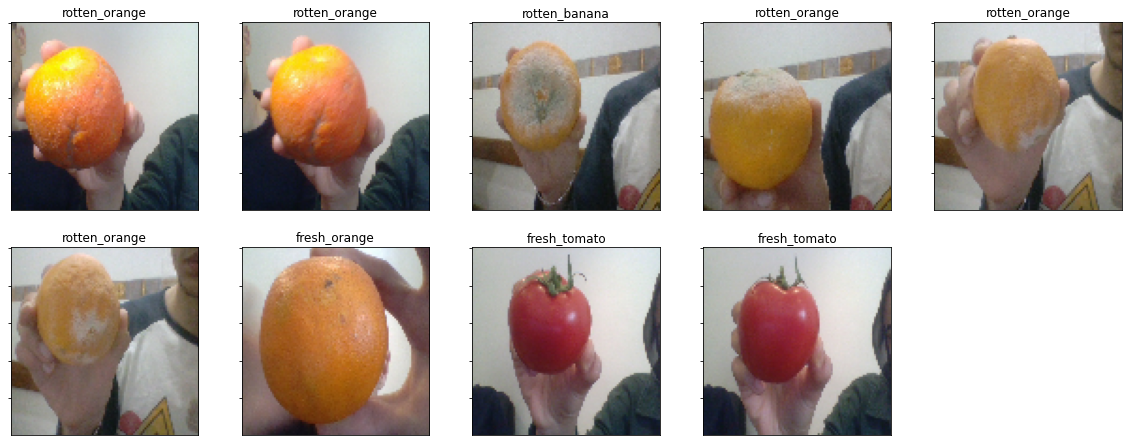

In [7]:
obj.read_images()
obj.predict()